<a href="https://colab.research.google.com/github/2019mohamed/Proximity-Search-For-Maximal-Subgraph-Enumeration/blob/main/Enumeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

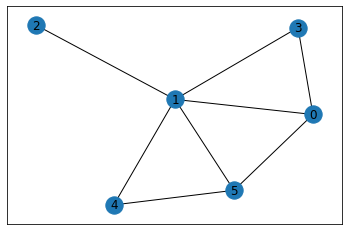

('[3]', 1)
('[0, 1]', 1)
('[0, 1, 2]', 1)
('[0, 1, 2, 3]', 1)
('[0, 1, 2, 3, 4]', 1)
('[0, 1, 2, 3, 4, 5]', 1)
('[0, 1, 2, 3, 5]', 1)
('[0, 1, 2, 4, 5]', 1)
('[0, 1, 2, 4]', 1)
('[0, 1, 2, 5]', 1)
('[0, 1, 3]', 1)
('[0, 1, 3, 4]', 1)
('[0, 1, 3, 4, 5]', 1)
('[0, 1, 3, 5]', 1)
('[0, 1, 4, 5]', 1)
('[0, 1, 4]', 1)
('[0, 1, 5]', 1)
('[0, 3]', 1)
('[0, 3, 5]', 1)
('[0, 3, 4, 5]', 1)
('[0, 4, 5]', 1)
('[0]', 1)
('[1, 2, 3, 4, 5]', 1)
('[1, 2, 3, 4]', 1)
('[1, 2, 3, 5]', 1)
('[1, 2, 3]', 1)
('[1, 2, 4, 5]', 1)
('[1, 2, 4]', 1)
('[1, 2, 5]', 1)
('[1, 3, 4, 5]', 1)
('[1, 3, 4]', 1)
('[1, 3, 5]', 1)
('[1, 4, 5]', 1)
('[2]', 1)
('[4]', 1)
('[3]', 1)
('[5]', 1)


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

class TrieNode:
    """A node in the trie structure"""

    def __init__(self, char):
        # the character stored in this node
        self.char = char

        # whether this can be the end of a word
        self.is_end = False

        # a counter indicating how many times a word is inserted
        # (if this node's is_end is True)
        self.counter = 0

        # a dictionary of child nodes
        # keys are characters, values are nodes
        self.children = {}

class TrieNode:
    """A node in the trie structure"""

    def __init__(self, char):
        # the character stored in this node
        self.char = char

        # whether this can be the end of a word
        self.is_end = False

        # a counter indicating how many times a word is inserted
        # (if this node's is_end is True)
        self.counter = 0

        # a dictionary of child nodes
        # keys are characters, values are nodes
        self.children = {}

class Trie(object):
    """The trie object"""

    def __init__(self):
        """
        The trie has at least the root node.
        The root node does not store any character
        """
        self.root = TrieNode("")
    
    def insert(self, word):
        """Insert a word into the trie"""
        node = self.root
        
        # Loop through each character in the word
        # Check if there is no child containing the character, create a new child for the current node
        for char in word:
            if char in node.children:
                node = node.children[char]
            else:
                # If a character is not found,
                # create a new node in the trie
                new_node = TrieNode(char)
                node.children[char] = new_node
                node = new_node
        
        # Mark the end of a word
        node.is_end = True

        # Increment the counter to indicate that we see this word once more
        node.counter += 1
        
    def dfs(self, node, prefix):
        """Depth-first traversal of the trie
        
        Args:
            - node: the node to start with
            - prefix: the current prefix, for tracing a
                word while traversing the trie
        """
        if node.is_end:
            self.output.append((prefix + node.char, node.counter))
        
        for child in node.children.values():
            self.dfs(child, prefix + node.char)
            
    def query(self, x):
        """Given an input (a prefix), retrieve all words stored in
        the trie with that prefix, sort the words by the number of 
        times they have been inserted
        """
        # Use a variable within the class to keep all possible outputs
        # As there can be more than one word with such prefix
        self.output = []
        node = self.root
        
        # Check if the prefix is in the trie
        for char in x:
            if char in node.children:
                node = node.children[char]
            else:
                # cannot found the prefix, return empty list
                return []
        
        # Traverse the trie to get all candidates
        self.dfs(node, x[:-1])

        # Sort the results in reverse order and return
        return sorted(self.output, key=lambda x: x[1], reverse=True)

def ListingMaximalConnectedWellDefine (g):
  for e in list(g.edges):
    #s = list(g.edges)[0]
    h = nx.Graph()
    h.add_edges_from([e])
    helper(h)

ans = Trie()
def helper (s):
  #ans.append(str(s))
  ans.insert(str(list(s)))
  #print(list(s))
  for v in set(g) - set(s):
    for s_ in neighbors2(s,v):
      if  len(ans.query(str(list(s_)))) == 0 :
        helper(s_)

def neighbors1 (s,v):# for bibartite graph
  X,Y = nx.algorithms.bipartite.basic.sets(s)
  l = []
  B= [X,Y]
  for i , b in enumerate(B):
    N_v = g[v]
    b_N_v = set(b) - set(N_v)
    all = set([v]) | b_N_v | B[1 - i]
    cc = nx.connected_components(g.subgraph(all))
    for c in list(cc):
      if v in c:
        l.append(g.subgraph(c))
        break

  return l

def neighbors2 (s,v):# for chordal graphs
  h = g.subgraph(list(s) + [v])
  Q = nx.algorithms.chordal.chordal_graph_cliques(h)
  l = []
  for q in Q:
    s_v = set(s) | set([v])
    N_q = set(g[v]) - set(q)
    cc = nx.connected_components(g.subgraph(s_v - N_q))
    for c in list(cc):
      if v in c:
        l.append(g.subgraph(c))
        break

  return l


g = nx.generators.random_graphs.fast_gnp_random_graph(6,0.5)
nx.draw_networkx(g)
plt.show()
ListingMaximalConnectedWellDefine(g)

ans.dfs(ans.root , '')
for _ in ans.output:
  if _[1] == 1:
    print(_)